<a href="https://colab.research.google.com/github/mbohling/spiking-neuron-model/blob/main/SNM_Integrate_and_Fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Welcome to Simulating Spiking Model Neurons
In the following notebook, you will see the integrate-and-fire neuron implemented in Python.  Read through each section in order and run the blocks of code as you reach them.

## Integrate-And-Fire
The goal of this section is to walk through a simple implementation of the integrate-and-fire model neuron.

Recall that the basic equation is expressed as follows:

$ \displaystyle \tau_{m}\frac{dV}{dt} = E_{L} - V(t) + R_{m}I_{e} $




### Voltage Parameters

We will start by defining the Voltage-Parameters that determine the resting, threshold, spike, and reset values:

*   $ V_{rest} = -70 mV $
*   $ V_{th} = -54 mV $
*   $ V_{reset} = -80 mV $
*   $ V_{spike} = 0 mV $




In [ ]:
# Voltage Paramaters - Units mV (1 mV = 1e-3 Volts)
# Using the values above, set the missing variable values
Vrest = -70
Vth
Vreset
Vspike

### Neuron Properties
We now need to define the values for the Membrane Resistance $ R_{m} $, the Membrane Capacitance, $ C_{m} $, and calculate the Membrane Time Constant.  Use the following values:
*    $ R_{m} = 10M\Omega $
*    $ C_{m} = 1 $ [Missing Units]
*    $ \tau_{m} = R_{m}C_{m} $


In [ ]:
# Total Membrane Resistance - Units M_Ohm (1 M_Ohm = 1e6 Ohms)
Rm = 10

# Total Membrane Capacitance - Units 
Cm = 10

# Membrane Time Constant - Units ms (1 ms = 1e-3 Seconds)
tau_m = Rm*Cm

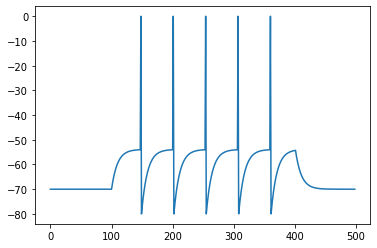

In [ ]:
# Integrate-and-Fire Model Neuron

import matplotlib.pyplot as plt
import numpy as np

# Voltage Paramaters - Units mV (1 mV = 1e-3 Volts)
Vrest = -70
Vth = -54
Vreset = -80
Vspike = 0

# Total Membrane Resistance - Units M_Ohm (1 M_Ohm = 1e6 Ohms)
Rm = 10

# Membrane Time Constant - Units ms (1 ms = 1e-3 Seconds)
tau_m = 10

# Initial V
V = Vrest
EL = Vrest

# Simulation Time Span (0 to 500ms, dt = 1ms)
t0 = 0
dt = 1
t_final = 500

# Current Pulse Time Span - Units ms (1 ms = 1e-3 Seconds)
t_pulse = 300  # This is how long the current is being injected

start_current = np.absolute(t_final-t_pulse)/2 # |500-300|/2 = 200/2 = 100ms
end_current = start_current+t_pulse # 100+300 = 400ms

# Input Current: Ie - Units nA (1 nA = 10-9 Amperes)
# Using 1.75 for default
# < 1.6 will result in no spikes
#Ie = 1.75
#Ie = 2
#Ie = 1.59
Ie = 1.61

time = np.linspace(0,500,501, dtype=np.dtype(np.int16))
Vt = [0] * len(time)
Vt[0] = V

for t in time[0:-2]:

    if t < start_current or t > end_current:
        ie = 0
    else:
        ie = Ie

    # General Passive Integrate-and-Fire Model
    dVt = (1/tau_m)*(EL - Vt[t] + Rm*ie)*dt

    Vt[t+1] = Vt[t] + dVt

    # If V crosses our threshold value Vth:
    # 1. Set V to a high Spike value (I set Vspike to 0)
    # 2. Store the Vspike value at time t
    # 4. Set V back to Vreset
    if Vt[t+1] >= Vth:
        Vt[t] = Vspike # 1
        Vt[t+1] = Vreset # 4

plt.plot(time[0:-2], Vt[0:-2])       # Plot the membrane potential
plt.show()               # Display the plot
